## Installing the required packages

In [1]:
pip install squarify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing the required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import subprocess
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [3]:
df = pd.read_csv("phishing_data.csv")

## Analyising the  data

In [4]:
df.head()

url  length_url  \
0     http://www.progarchives.com/album.asp?id=61737          46   
1  http://signin.eday.co.uk.ws.edayisapi.dllsign....         128   
2  http://www.avevaconstruction.com/blesstool/ima...          52   
3                              http://www.jp519.com/          21   
4                       https://www.velocidrone.com/          28   

   length_hostname    ip  nb_dots nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0               20  zero        3       zero      0      1       0      0   
1              120     0       10          0      0      0       0      0   
2               25     0        3          0      0      0       0      0   
3               13     0        2          0      0      0       0      0   
4               19     0        2          0      0      0       0      0   

   ...  domain_in_title  domain_with_copyright  whois_registered_domain  \
0  ...                1                    one                        0   
1  ...                1                   zero                        0   
2  ...                1                   zero                        0   
3  ...                1                    one                        0   
4  ...                0                   zero                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                         627        6678        78526           0   
1                         300          65            0           0   
2                         119        1707            0           0   
3                         130        1331            0           0   
4                         164        1662       312044           0   

   google_index  page_rank      status  
0             0          5    phishing  
1             1          0    phishing  
2             1          0    phishing  
3             0          0  legitimate  
4             0          4  legitimate  

[5 rows x 89 columns]

In [5]:
df.shape

(11481, 89)

In [6]:
df.describe()

length_url  length_hostname       nb_dots         nb_at  \
count  11481.000000     11481.000000  11481.000000  11481.000000   
mean      61.203902        21.129344      2.496298      0.022124   
std       56.795786        10.633279      1.421589      0.155721   
min       13.000000         4.000000      1.000000      0.000000   
25%       33.000000        15.000000      2.000000      0.000000   
50%       47.000000        19.000000      2.000000      0.000000   
75%       71.000000        24.000000      3.000000      0.000000   
max     1641.000000       214.000000     24.000000      4.000000   

              nb_qm        nb_and    nb_or         nb_eq  nb_underscore  \
count  11481.000000  11481.000000  11481.0  11481.000000   11481.000000   
mean       0.140928      0.168975      0.0      0.299364       0.334117   
std        0.365781      0.871249      0.0      1.040306       1.165724   
min        0.000000      0.000000      0.0      0.000000       0.000000   
25%        0.000000      0.000000      0.0      0.000000       0.000000   
50%        0.000000      0.000000      0.0      0.000000       0.000000   
75%        0.000000      0.000000      0.0      0.000000       0.000000   
max        3.000000     19.000000      0.0     19.000000      18.000000   

           nb_tilde  ...    right_clic   empty_title  domain_in_title  \
count  11481.000000  ...  11481.000000  11481.000000     11481.000000   
mean       0.006707  ...      0.001394      0.125425         0.773713   
std        0.081623  ...      0.037307      0.331214         0.418445   
min        0.000000  ...      0.000000      0.000000         0.000000   
25%        0.000000  ...      0.000000      0.000000         1.000000   
50%        0.000000  ...      0.000000      0.000000         1.000000   
75%        0.000000  ...      0.000000      0.000000         1.000000   
max        1.000000  ...      1.000000      1.000000         1.000000   

       whois_registered_domain  domain_registration_length    domain_age  \
count             11481.000000                11481.000000  11481.000000   
mean                  0.074122                  492.388468   4059.613884   
std                   0.261981                  811.349827   3110.854830   
min                   0.000000                   -1.000000    -12.000000   
25%                   0.000000                   85.000000    966.000000   
50%                   0.000000                  246.000000   4003.000000   
75%                   0.000000                  452.000000   7006.000000   
max                   1.000000                29829.000000  12873.000000   

        web_traffic    dns_record  google_index     page_rank  
count  1.148100e+04  11481.000000  11481.000000  11481.000000  
mean   8.630862e+05      0.019598      0.535493      3.190837  
std    2.000251e+06      0.138619      0.498760      2.531696  
min    0.000000e+00      0.000000      0.000000      0.000000  
25%    0.000000e+00      0.000000      0.000000      1.000000  
50%    2.187000e+03      0.000000      1.000000      3.000000  
75%    3.733190e+05      0.000000      1.000000      5.000000  
max    1.076799e+07      1.000000      1.000000     10.000000  

[8 rows x 84 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11481 non-null  object 
 1   length_url                  11481 non-null  int64  
 2   length_hostname             11481 non-null  int64  
 3   ip                          11481 non-null  object 
 4   nb_dots                     11481 non-null  int64  
 5   nb_hyphens                  11481 non-null  object 
 6   nb_at                       11481 non-null  int64  
 7   nb_qm                       11481 non-null  int64  
 8   nb_and                      11481 non-null  int64  
 9   nb_or                       11481 non-null  int64  
 10  nb_eq                       11481 non-null  int64  
 11  nb_underscore               11481 non-null  int64  
 12  nb_tilde                    11481 non-null  int64  
 13  nb_percent                  114

In [8]:
# Check for null values
null_values = df.isnull().sum()

In [9]:
# Display the count of null values in each column
print(null_values)

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


## Data visualization

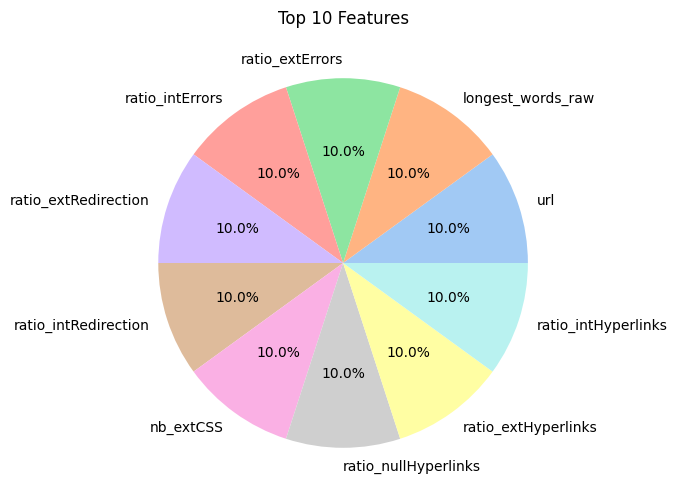

In [10]:
# Count the occurrences of each feature
feature_counts = df.apply(pd.Series.value_counts).sum()

# Sort the features by count in descending order
sorted_features = feature_counts.sort_values(ascending=False)

# Take the top 10 features for the pie chart
top_features = sorted_features[:10]

# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
plt.pie(top_features.values, labels=top_features.index, autopct='%1.1f%%')

# Set the title
plt.title("Top 10 Features")

# Show the plot
plt.show()


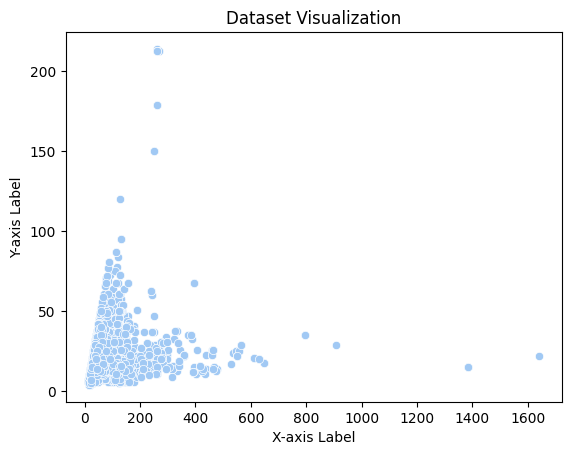

In [11]:
# Visualize the dataset
sns.scatterplot(data=df, x='length_url', y='length_hostname')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Dataset Visualization')
plt.show()

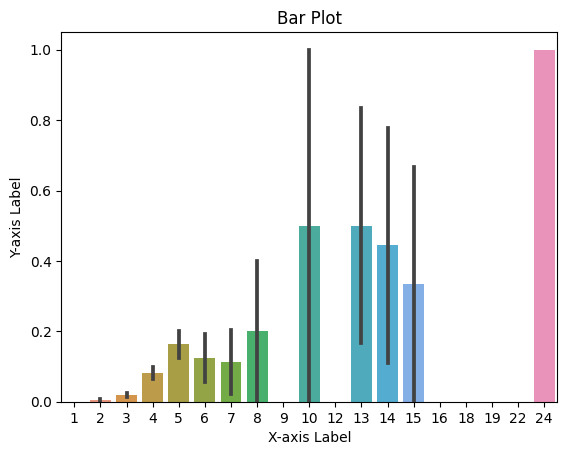

In [12]:
# Plot the bar plot
sns.barplot(data=df, x='nb_dots', y='nb_at')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Bar Plot')
plt.show()

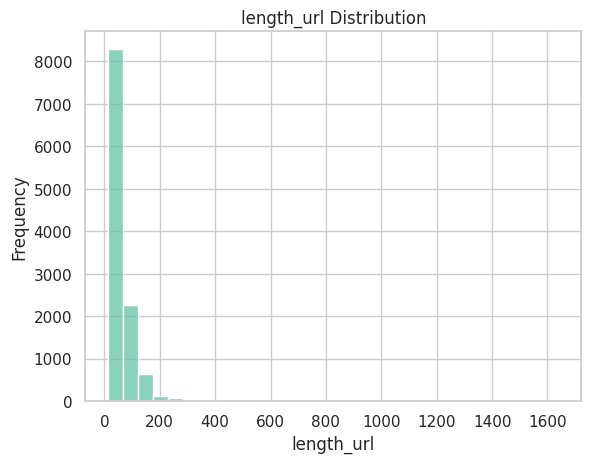

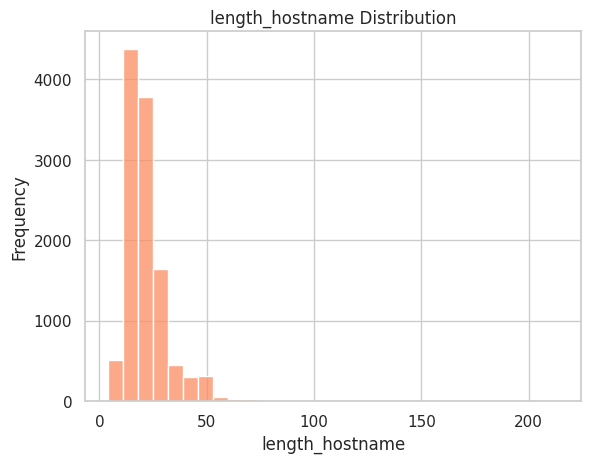

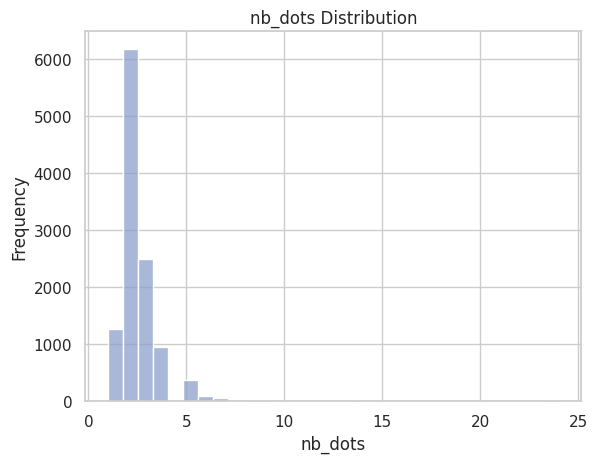

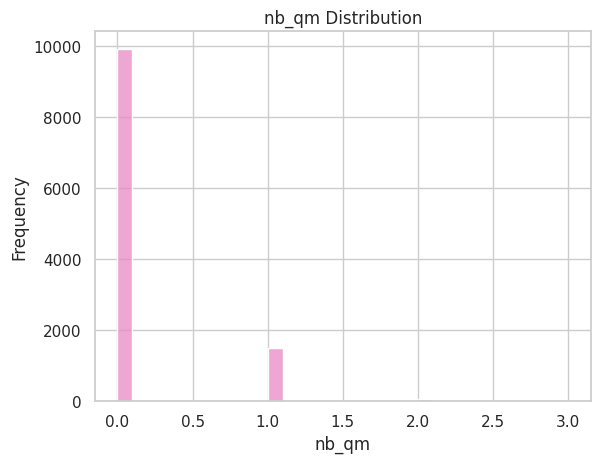

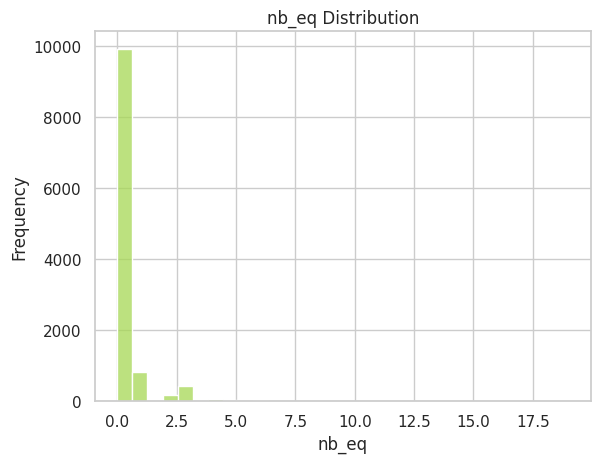

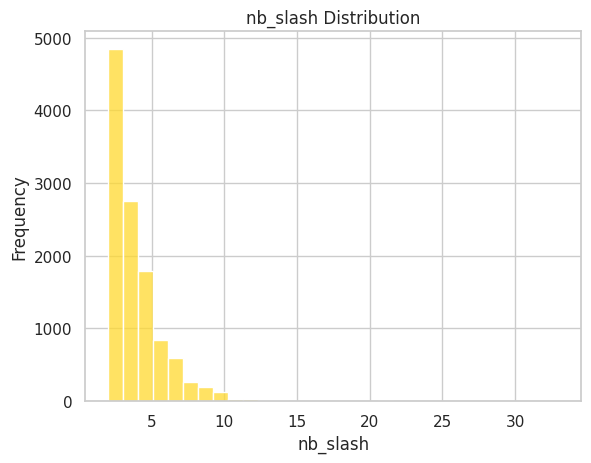

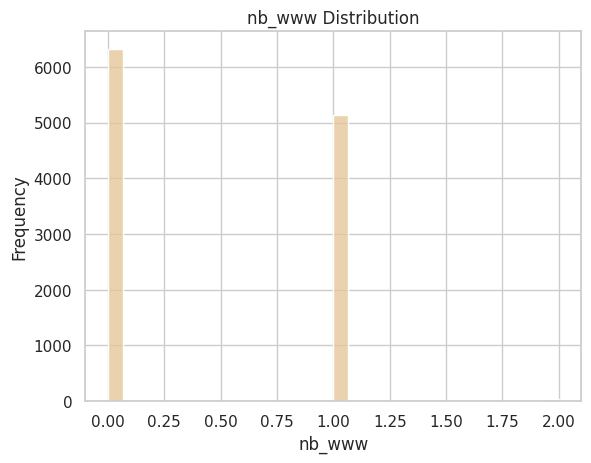

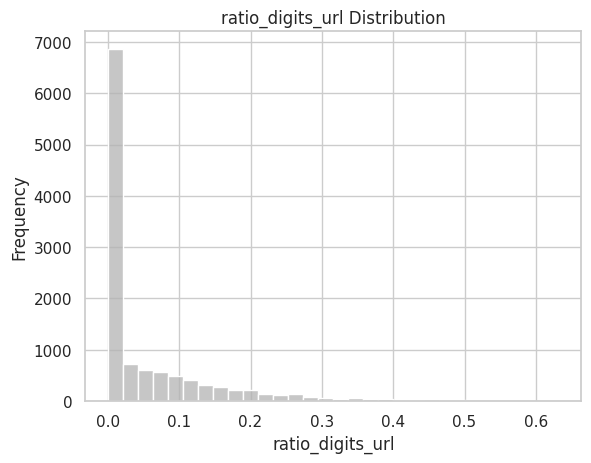

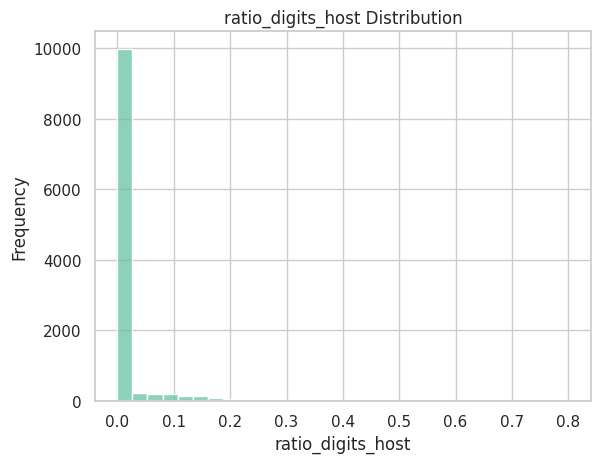

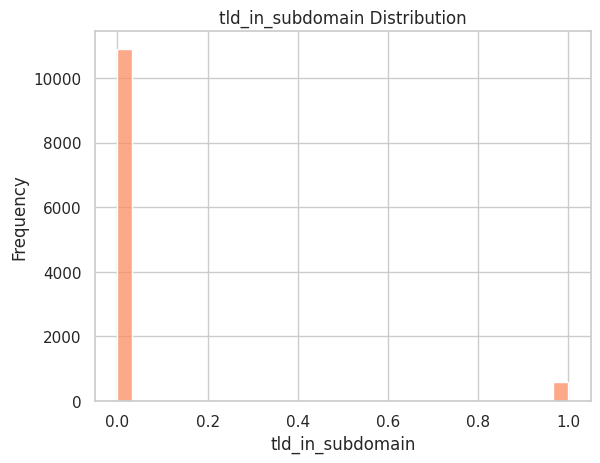

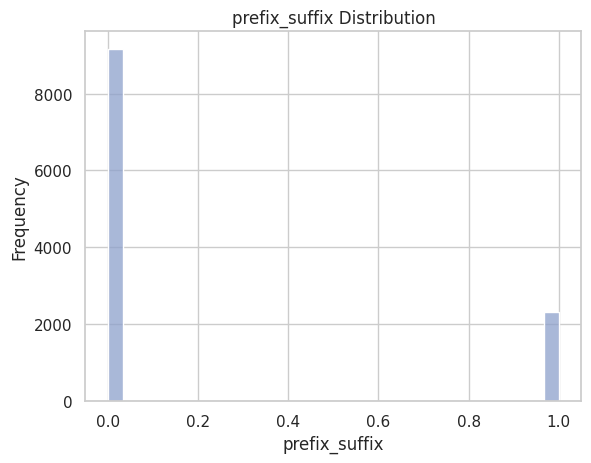

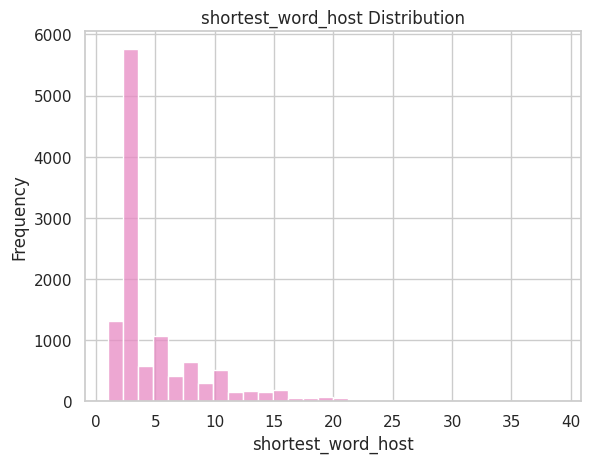

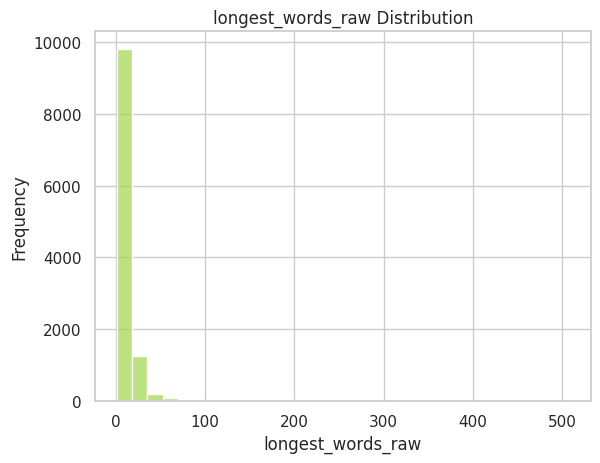

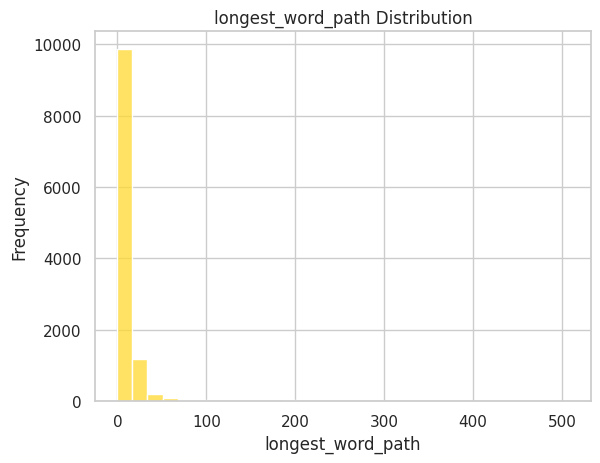

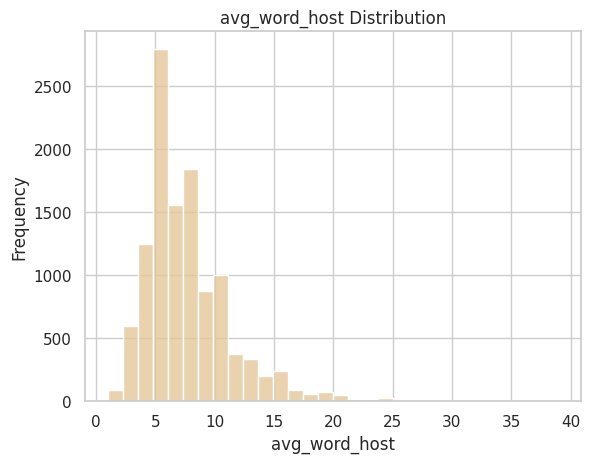

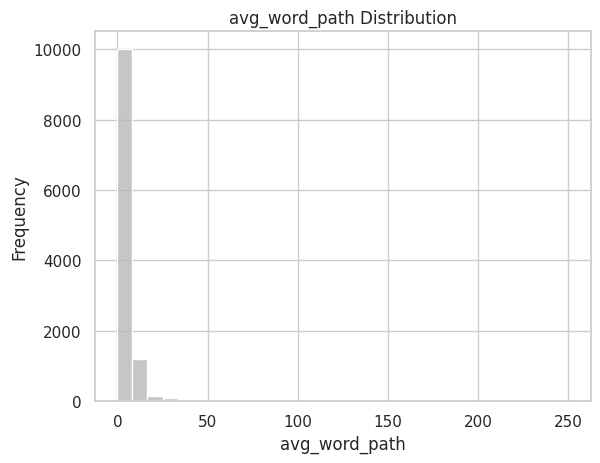

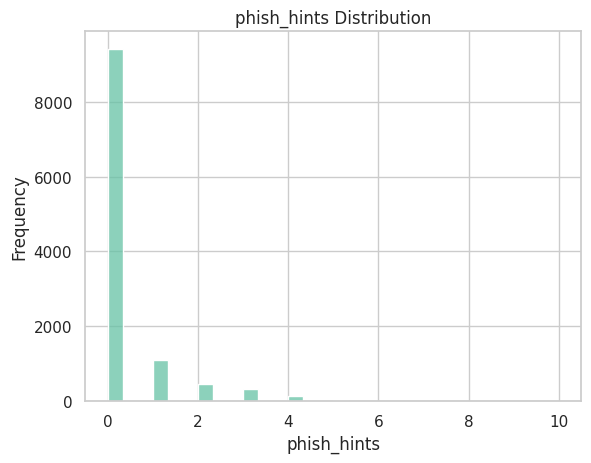

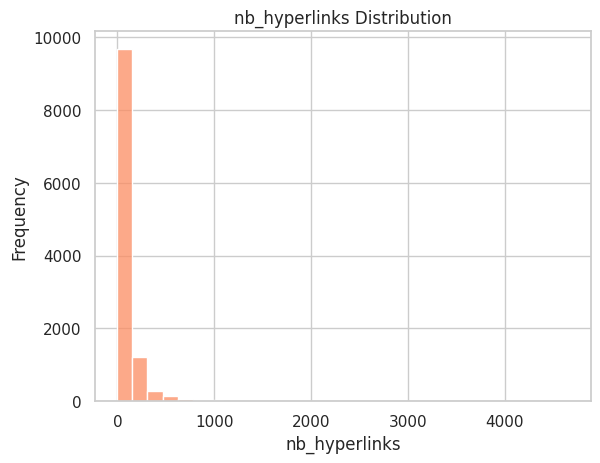

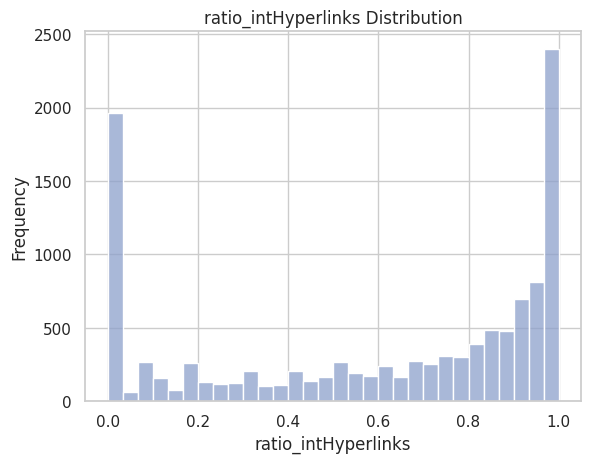

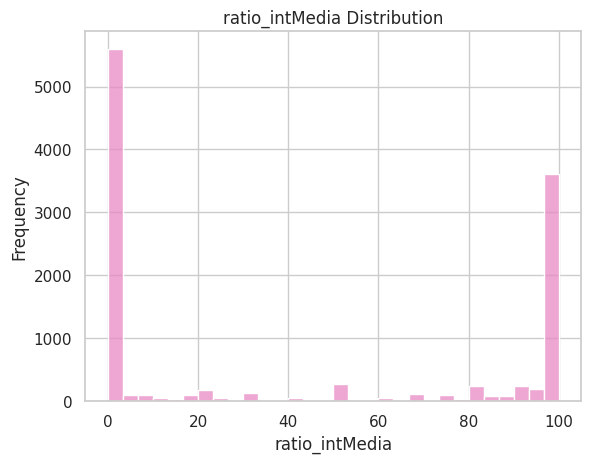

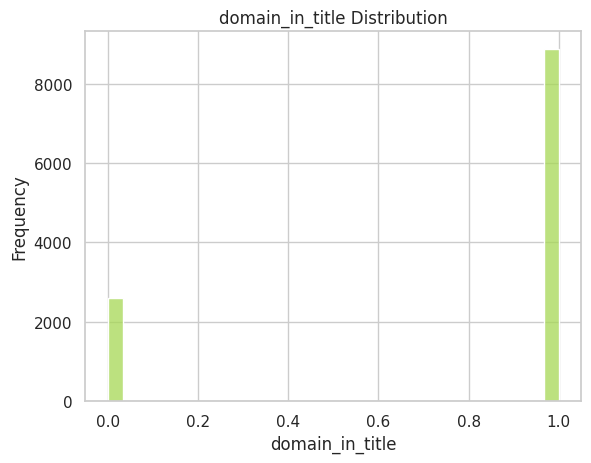

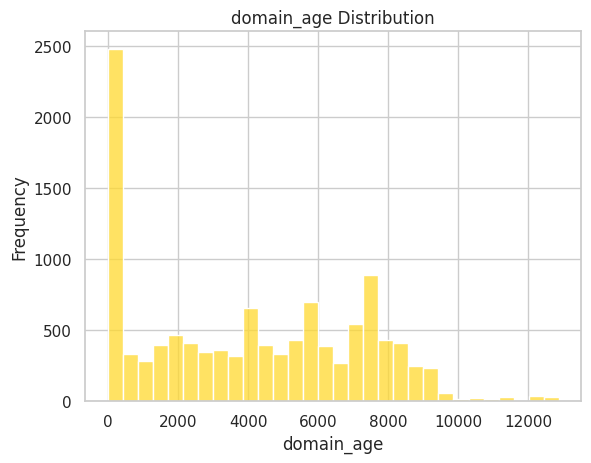

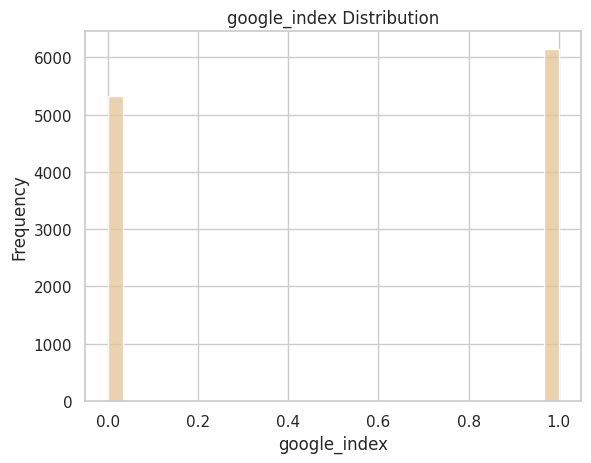

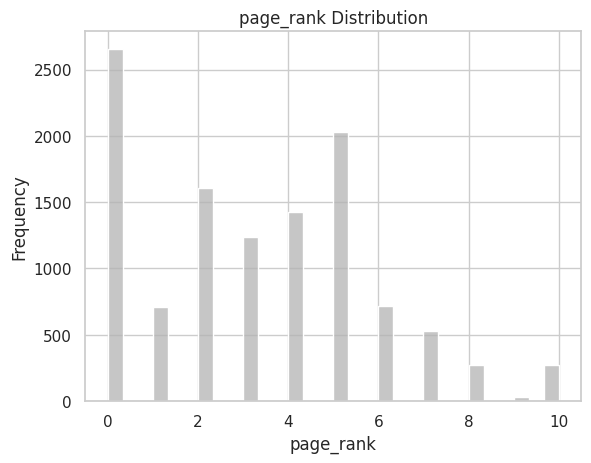

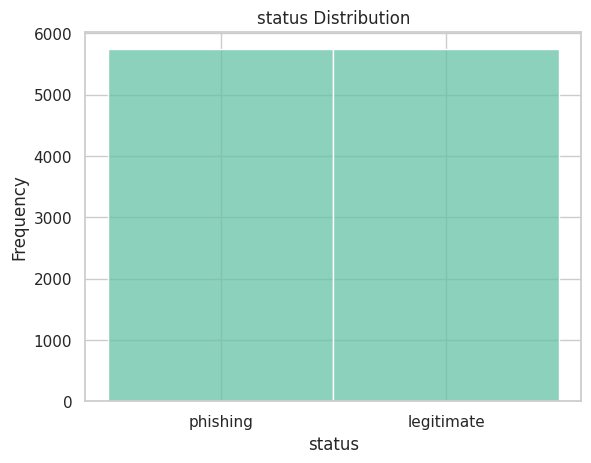

In [13]:
import seaborn as sns
import itertools

# Define a color palette for the plots
color_palette = itertools.cycle(sns.color_palette('Set2'))

# Iterate over the list of features
for feature in ['length_url', 'length_hostname', 'nb_dots', 'nb_qm', 'nb_eq', 'nb_slash', 'nb_www', 'ratio_digits_url', 'ratio_digits_host', 'tld_in_subdomain', 'prefix_suffix', 'shortest_word_host', 'longest_words_raw', 'longest_word_path', 'avg_word_host', 'avg_word_path', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_intMedia', 'domain_in_title', 'domain_age', 'google_index', 'page_rank', 'status']:
    # Create a new figure and set the style using Seaborn
    plt.figure()
    sns.set(style='whitegrid')

    # Plot the feature using a histogram with a different color
    sns.histplot(data=df, x=feature, bins=30, color=next(color_palette))

    # Set labels and title
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution')

    # Show the plot
    plt.show()


In [14]:
df['status'].value_counts()

phishing      5741
legitimate    5740
Name: status, dtype: int64

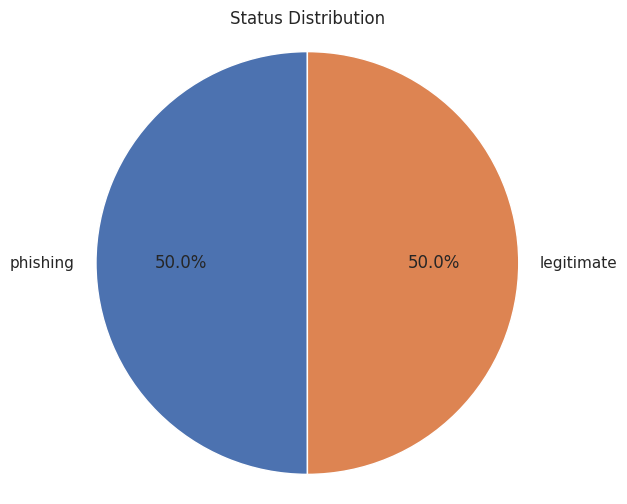

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = {
    'status': ['phishing', 'legitimate'],
    'count': [5741, 5740]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot pie chart using matplotlib and seaborn
plt.figure(figsize=(6, 6))
plt.title('Status Distribution')
sns.set_palette("Set3")
plt.pie(df['count'], labels=df['status'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Data preprocessing

In [16]:
pd.set_option('display.max_rows', 100)
df.isna().sum()

status    0
count     0
dtype: int64

In [17]:
# Load the dataset
df = pd.read_csv('phishing_data.csv')

# Display the dataset before deleting the column
print("Dataset before deleting a column:")
df.head()

# Delete a column
column_to_delete = 'url'
df.drop(column_to_delete, axis=1, inplace=True)

# Display the dataset after deleting the column
print("\nDataset after deleting the column:")
df.head()

Dataset before deleting a column:

Dataset after deleting the column:


length_url  length_hostname    ip  nb_dots nb_hyphens  nb_at  nb_qm  \
0          46               20  zero        3       zero      0      1   
1         128              120     0       10          0      0      0   
2          52               25     0        3          0      0      0   
3          21               13     0        2          0      0      0   
4          28               19     0        2          0      0      0   

   nb_and  nb_or  nb_eq  ...  domain_in_title  domain_with_copyright  \
0       0      0      1  ...                1                    one   
1       0      0      0  ...                1                   zero   
2       0      0      0  ...                1                   zero   
3       0      0      0  ...                1                    one   
4       0      0      0  ...                0                   zero   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0                         627        6678   
1                        0                         300          65   
2                        0                         119        1707   
3                        0                         130        1331   
4                        0                         164        1662   

   web_traffic  dns_record  google_index  page_rank      status  
0        78526           0             0          5    phishing  
1            0           0             1          0    phishing  
2            0           0             1          0    phishing  
3            0           0             0          0  legitimate  
4       312044           0             0          4  legitimate  

[5 rows x 88 columns]

## Converting categorical values into numeric values

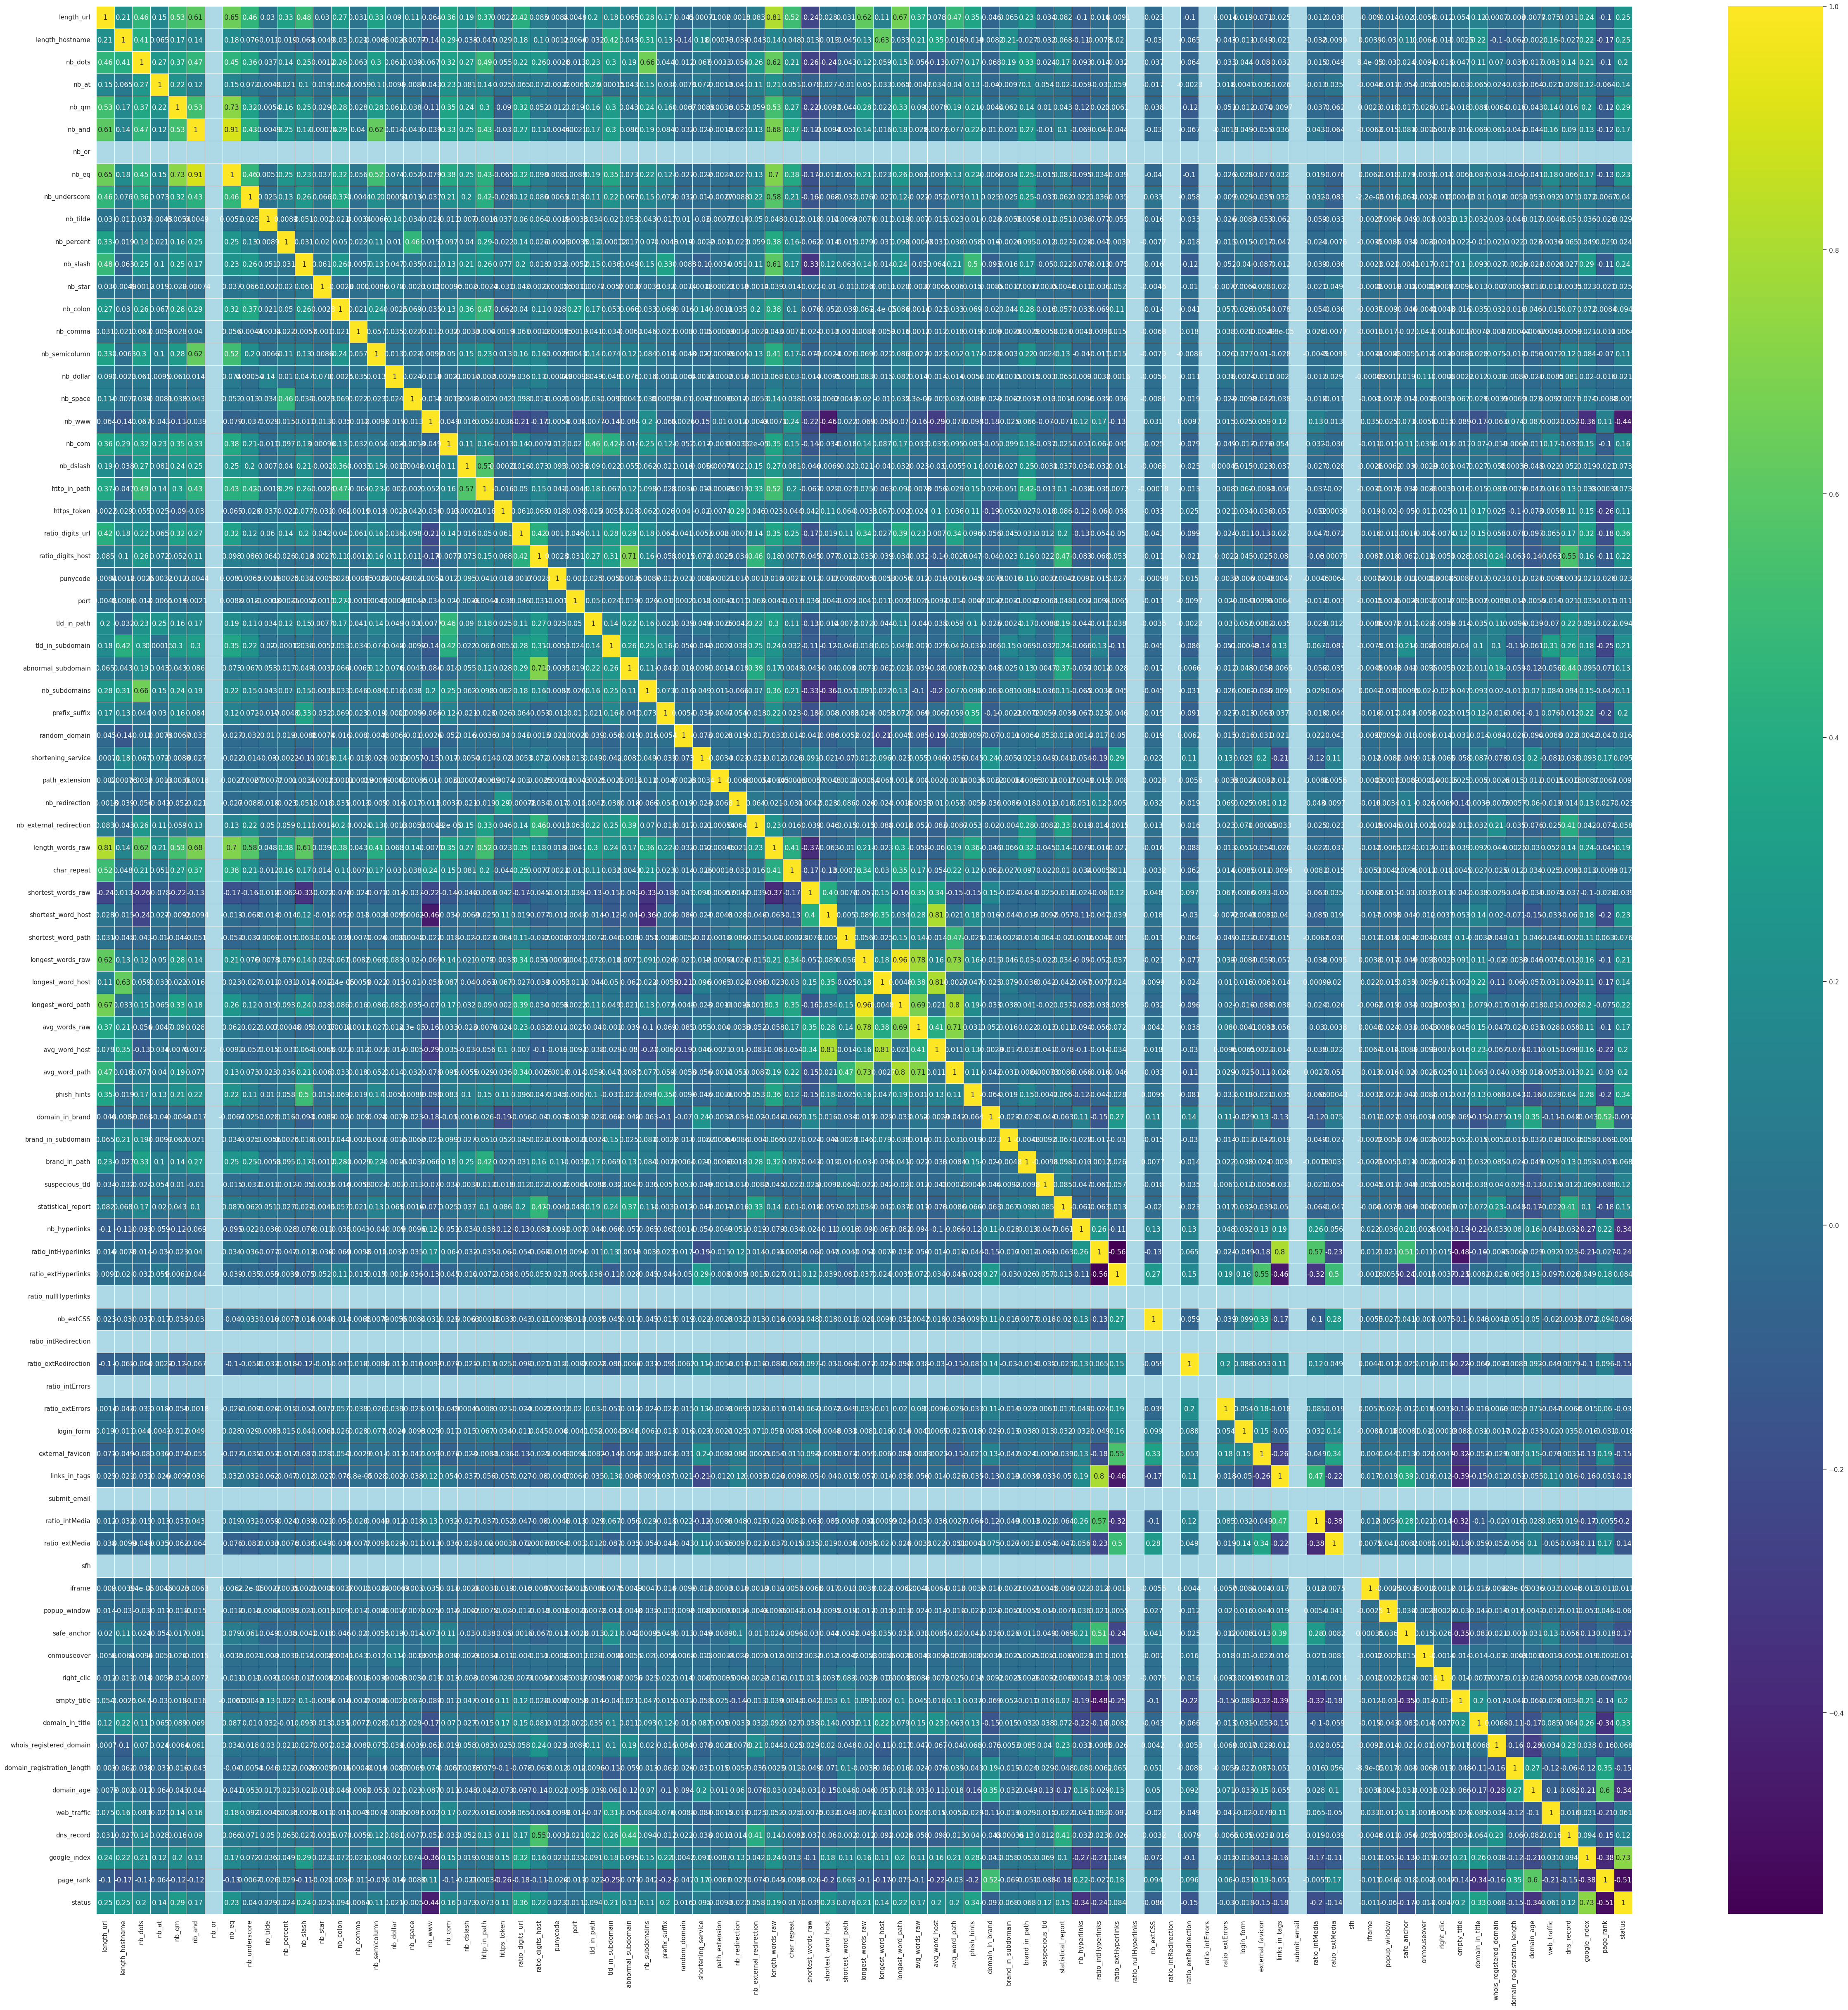

In [18]:
# Set display options
pd.set_option('display.max_rows', 100)

# Convert target variable to numeric format
classes = {'legitimate': 0, 'phishing': 1}
df['status'] = df['status'].map(classes)

# Exclude non-numeric columns from correlation analysis
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Reset display options
pd.reset_option('display.max_rows')

# Plot the correlation matrix
plt.figure(figsize=(60, 60))
color = plt.get_cmap('viridis').copy()
color.set_bad('lightblue')
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()


In [19]:
corr_matrix['status']

length_url         0.245506
length_hostname    0.248362
nb_dots            0.200943
nb_at              0.142065
nb_qm              0.293345
                     ...   
web_traffic        0.061406
dns_record         0.123777
google_index       0.726066
page_rank         -0.510481
status             1.000000
Name: status, Length: 85, dtype: float64

## Plotting 3 dimensional plot

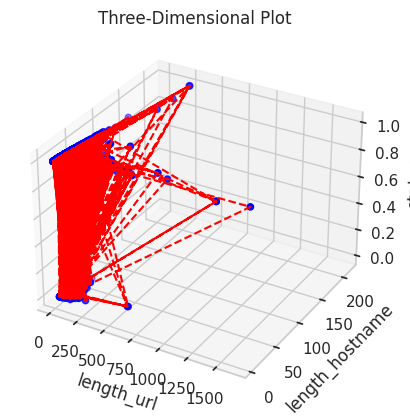

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the relevant columns for the plot
x = df['length_url']
y = df['length_hostname']
z = df['status']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, c='blue', marker='o')

# Connect the points with lines
ax.plot(x, y, z, c='red', linestyle='--')

# Set labels for the axes
ax.set_xlabel('length_url')
ax.set_ylabel('length_hostname')
ax.set_zlabel('status')

# Set the title of the plot
ax.set_title('Three-Dimensional Plot')

# Show the plot
plt.show()


In [21]:
status_corr = corr_matrix['status']
status_corr.shape

(85,)

In [22]:
def feature_selector_correlation(cmatrix, threshold):

    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score))
    return result

## Features selection

In [23]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('length_url', ['0.245506']),
 ('length_hostname', ['0.248362']),
 ('nb_dots', ['0.200943']),
 ('nb_qm', ['0.293345']),
 ('nb_eq', ['0.234166']),
 ('nb_slash', ['0.239853']),
 ('nb_www', ['-0.443791']),
 ('ratio_digits_url', ['0.356409']),
 ('ratio_digits_host', ['0.224758']),
 ('tld_in_subdomain', ['0.209509']),
 ('prefix_suffix', ['0.201750']),
 ('shortest_word_host', ['0.225794']),
 ('longest_words_raw', ['0.206997']),
 ('longest_word_path', ['0.217614']),
 ('avg_word_host', ['0.202024']),
 ('avg_word_path', ['0.200937']),
 ('phish_hints', ['0.339576']),
 ('nb_hyperlinks', ['-0.344082']),
 ('ratio_intHyperlinks', ['-0.242551']),
 ('ratio_intMedia', ['-0.201473']),
 ('domain_in_title', ['0.329775']),
 ('domain_age', ['-0.335009']),
 ('google_index', ['0.726066']),
 ('page_rank', ['-0.510481']),
 ('status', ['1.000000'])]

## Plotting Treemap of selected features

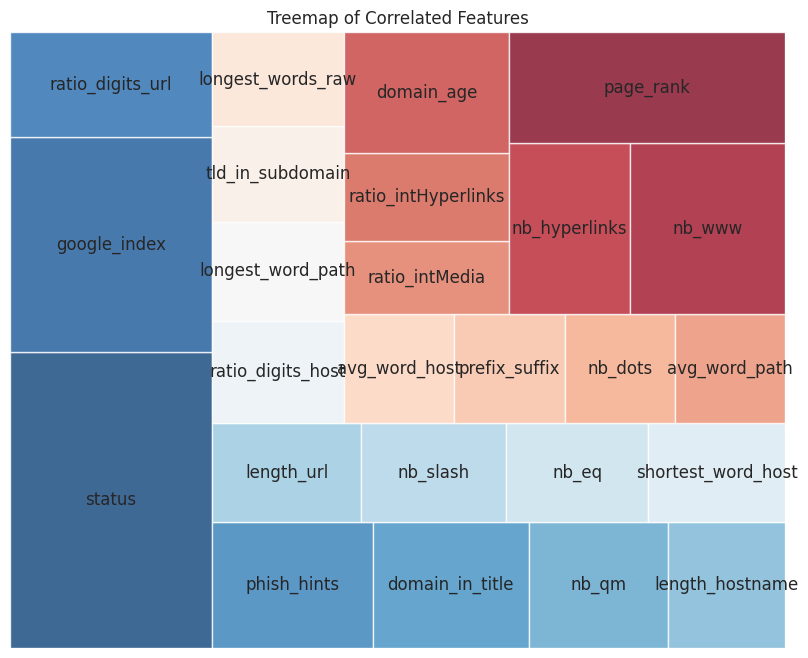

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

# Create a dictionary to store the feature names and their correlation values
feature_data = {
    feature: float(value[0])
    for feature, value in features_selected
}

# Convert the dictionary to a list of tuples sorted by correlation values
sorted_data = sorted(feature_data.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and correlation values
labels = [item[0] for item in sorted_data]
values = [item[1] for item in sorted_data]

# Calculate the sizes for the treemap squares
sizes = [abs(value) for value in values]

# Set the color scheme for the treemap
cmap = 'viridis' if min(values) >= 0 else 'RdBu_r'

# Convert the colormap to a list of colors
colors = sns.color_palette(cmap, len(labels))

# Create the treemap plot
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

# Set the title and axis labels using seaborn style
plt.title('Treemap of Correlated Features')
plt.axis('off')

# Show the plot
plt.show()


In [25]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features

['length_url',
 'length_hostname',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_intMedia',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [26]:
X= df[selected_features]
X

length_url  length_hostname  nb_dots  nb_qm  nb_eq  nb_slash  nb_www  \
0              46               20        3      1      1         3       1   
1             128              120       10      0      0         3       0   
2              52               25        3      0      0         4       1   
3              21               13        2      0      0         3       1   
4              28               19        2      0      0         3       1   
...           ...              ...      ...    ...    ...       ...     ...   
11476          44               25        3      0      0         3       0   
11477          43               14        3      0      0         5       0   
11478          39               22        3      0      0         4       1   
11479         114               11        3      0      0         8       1   
11480          41               20        3      0      0         3       0   

       ratio_digits_url  ratio_digits_host  tld_in_subdomain  ...  \
0              0.108696           0.000000                 0  ...   
1              0.054688           0.058333                 0  ...   
2              0.000000           0.000000                 0  ...   
3              0.142857           0.230769                 0  ...   
4              0.000000           0.000000                 0  ...   
...                 ...                ...               ...  ...   
11476          0.181818           0.320000                 0  ...   
11477          0.139535           0.000000                 0  ...   
11478          0.000000           0.000000                 0  ...   
11479          0.000000           0.000000                 0  ...   
11480          0.048780           0.100000                 0  ...   

       avg_word_host  avg_word_path  phish_hints  nb_hyperlinks  \
0                7.5       3.750000            0            143   
1               10.7       0.000000            2              0   
2               10.0       5.666667            0              3   
3                4.0       0.000000            0            404   
4                7.0       0.000000            0             57   
...              ...            ...          ...            ...   
11476           10.5       4.500000            0              8   
11477            5.0       4.500000            0            135   
11478            8.5       3.000000            0              0   
11479            3.0       6.384615            0              0   
11480            8.0       6.000000            0              8   

       ratio_intHyperlinks  ratio_intMedia  domain_in_title  domain_age  \
0                 0.930070      100.000000                1        6678   
1                 0.000000        0.000000                1          65   
2                 1.000000        0.000000                1        1707   
3                 0.962871       92.307692                1        1331   
4                 0.684211       50.000000                0        1662   
...                    ...             ...              ...         ...   
11476             1.000000        0.000000                0        1338   
11477             0.911111       91.666667                1        7158   
11478             0.000000        0.000000                1         570   
11479             0.000000        0.000000                1        6828   
11480             1.000000        0.000000                0        1337   

       google_index  page_rank  
0                 0          5  
1                 1          0  
2                 1          0  
3                 0          0  
4                 0          4  
...             ...        ...  
11476             1          6  
11477             1          3  
11478             1          2  
11479             0          7  
11480             1          6  

[11481 rows x 24 columns]

In [27]:
y = df['status']
y

0        1
1        1
2        1
3        0
4        0
        ..
11476    1
11477    0
11478    1
11479    0
11480    1
Name: status, Length: 11481, dtype: int64

## Split the data into train and test sets

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

## Model Building and training
1.CNN

In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Convert DataFrame columns to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape the data for CNN (assuming features are 1D)
input_shape = (X_train.shape[1], 1)  # Update the input shape according to your features

X_train = X_train.reshape(X_train.shape[0], *input_shape)
X_test = X_test.reshape(X_test.shape[0], *input_shape)

# Define the CNN model with regularization techniques
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer to reduce overfitting
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
#checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
#early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=300, validation_data=(X_test, y_test))

# Print training loss and validation loss for every epoch
for epoch, loss, val_loss in zip(range(1, len(history.history['loss']) + 1), history.history['loss'], history.history['val_loss']):
    print(f"Epoch {epoch}: Training Loss = {loss:.4f}, Validation Loss = {val_loss:.4f}")

# Save the trained model
model.save('CNN_model.h5')


Epoch 1/300
287/287 [==============================] - 3s 5ms/step - loss: 12.1123 - accuracy: 0.6960 - val_loss: 0.5415 - val_accuracy: 0.7915
Epoch 2/300
287/287 [==============================] - 1s 4ms/step - loss: 0.5375 - accuracy: 0.7497 - val_loss: 0.4806 - val_accuracy: 0.7801
Epoch 3/300
287/287 [==============================] - 1s 4ms/step - loss: 0.5178 - accuracy: 0.7613 - val_loss: 0.4372 - val_accuracy: 0.8293
Epoch 4/300
287/287 [==============================] - 1s 4ms/step - loss: 0.4952 - accuracy: 0.7656 - val_loss: 0.4486 - val_accuracy: 0.8071
Epoch 5/300
287/287 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.7724 - val_loss: 0.4012 - val_accuracy: 0.8341
Epoch 6/300
287/287 [==============================] - 1s 4ms/step - loss: 0.4544 - accuracy: 0.7787 - val_loss: 0.4354 - val_accuracy: 0.8376
Epoch 7/300
287/287 [==============================] - 1s 4ms/step - loss: 0.4517 - accuracy: 0.7843 - val_loss: 0.3981 - val_accuracy: 0.840

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Perform predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


72/72 [==============================] - 0s 2ms/step
Precision: 0.9525547445255474
Recall: 0.9206349206349206
F1 Score: 0.9363228699551569


## Plotting  Graph of results

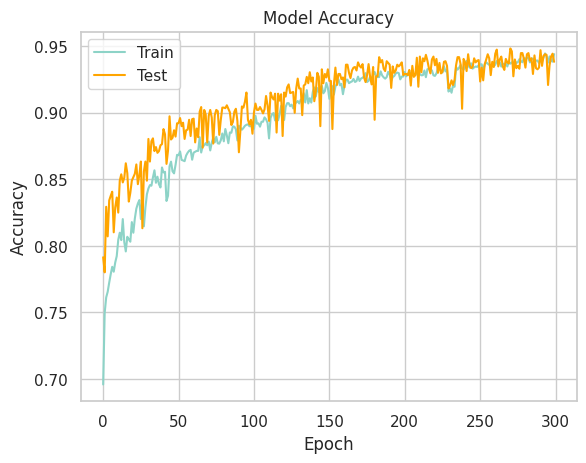

In [31]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#### 2.LSTM

In [32]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Convert DataFrame columns to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape the data for LSTM (assuming features are 1D)
input_shape = (X_train.shape[1], 1)  # Update the input shape according to your features

X_train = X_train.reshape(X_train.shape[0], *input_shape)
X_test = X_test.reshape(X_test.shape[0], *input_shape)

# Define the LSTM model with regularization techniques
model = Sequential()
model.add(LSTM(32, input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer to reduce overfitting
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks and training parameters if needed
# checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=180, validation_data=(X_test, y_test))

# Print training loss and validation loss for every epoch
for epoch, loss, val_loss in zip(range(1, len(history.history['loss']) + 1), history.history['loss'], history.history['val_loss']):
    print(f"Epoch {epoch}: Training Loss = {loss:.4f}, Validation Loss = {val_loss:.4f}")

# Save the trained model
model.save('LSTM_model.h5')


Epoch 1/180
287/287 [==============================] - 6s 14ms/step - loss: 0.4476 - accuracy: 0.7844 - val_loss: 0.3172 - val_accuracy: 0.8598
Epoch 2/180
287/287 [==============================] - 4s 15ms/step - loss: 0.2706 - accuracy: 0.8876 - val_loss: 0.2644 - val_accuracy: 0.9042
Epoch 3/180
287/287 [==============================] - 3s 12ms/step - loss: 0.2265 - accuracy: 0.9115 - val_loss: 0.2349 - val_accuracy: 0.9116
Epoch 4/180
287/287 [==============================] - 3s 12ms/step - loss: 0.2094 - accuracy: 0.9188 - val_loss: 0.2282 - val_accuracy: 0.9190
Epoch 5/180
287/287 [==============================] - 4s 13ms/step - loss: 0.1934 - accuracy: 0.9284 - val_loss: 0.2119 - val_accuracy: 0.9234
Epoch 6/180
287/287 [==============================] - 5s 17ms/step - loss: 0.1829 - accuracy: 0.9314 - val_loss: 0.2047 - val_accuracy: 0.9273
Epoch 7/180
287/287 [==============================] - 3s 12ms/step - loss: 0.1753 - accuracy: 0.9343 - val_loss: 0.2028 - val_accuracy:

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Perform predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


72/72 [==============================] - 1s 7ms/step
Precision: 0.9468723221936589
Recall: 0.9744268077601411
F1 Score: 0.96045197740113


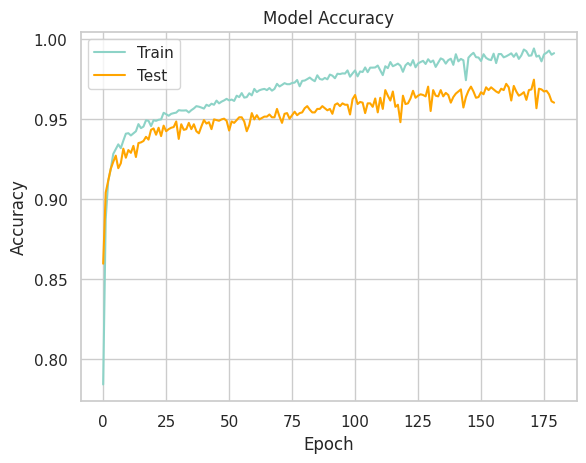

In [34]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [35]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('LSTM_model.h5')
